In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
!pip install seaborn


In [37]:
import seaborn as sns

In [38]:
data= pd.read_csv("bmi.csv")

In [39]:
data

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


In [40]:
data.tail()

,Gender,Height,Weight,Index
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5
499,Male,173,131,5


In [41]:
data.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [42]:
data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [43]:
!pip install scikit-learn

In [44]:
from sklearn.preprocessing import LabelEncoder

In [45]:
gender=LabelEncoder()
data['Gender']=gender.fit_transform(data['Gender'])

In [46]:
data.head()

,Gender,Height,Weight,Index
0,1,174,96,4
1,1,189,87,2
2,0,185,110,4
3,0,195,104,3
4,1,149,61,3


In [47]:
bins=(-1,0,1,2,3,4,5)
health=['malnourished','underweight','fit',' slightly overweight','overweight','extremly overweight']
data['Index']=pd.cut(data['Index'],bins=bins,labels=health)
data['Index']

0                overweight
1                       fit
2                overweight
3       slightly overweight
4       slightly overweight
               ...         
495     extremly overweight
496              overweight
497     extremly overweight
498     extremly overweight
499     extremly overweight
Name: Index, Length: 500, dtype: category
Categories (6, object): ['malnourished' < 'underweight' < 'fit' < ' slightly overweight' < 'overweight' < 'extremly overweight']

In [48]:
data['Index']

0                overweight
1                       fit
2                overweight
3       slightly overweight
4       slightly overweight
               ...         
495     extremly overweight
496              overweight
497     extremly overweight
498     extremly overweight
499     extremly overweight
Name: Index, Length: 500, dtype: category
Categories (6, object): ['malnourished' < 'underweight' < 'fit' < ' slightly overweight' < 'overweight' < 'extremly overweight']

In [49]:
data['Gender'].value_counts()

Gender
0    255
1    245
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Index'>

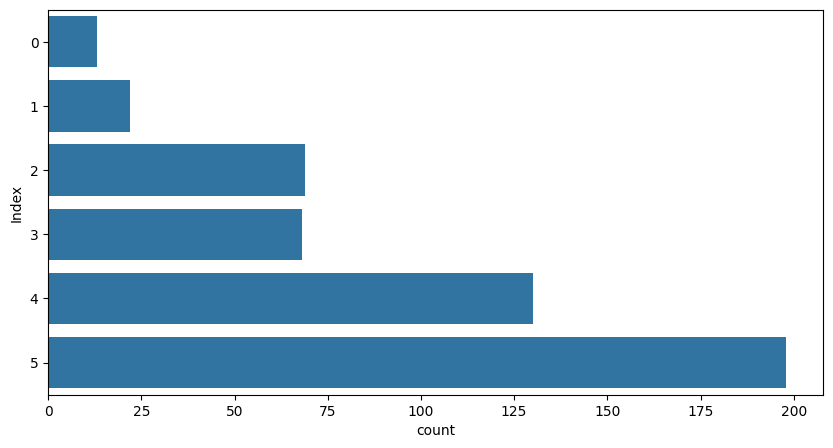

In [42]:
plt.figure(figsize=(10, 5))  # Adjust figure size
sns.countplot(y=data['Index'])  # Change x to y for horizontal bars


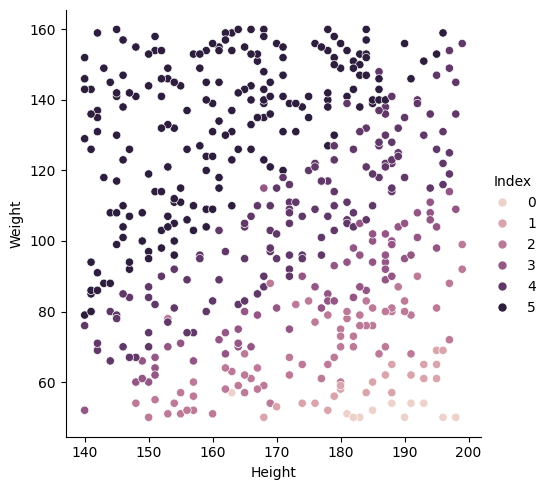

In [37]:
sns.relplot(x="Height",y="Weight",hue="Index", data =data)

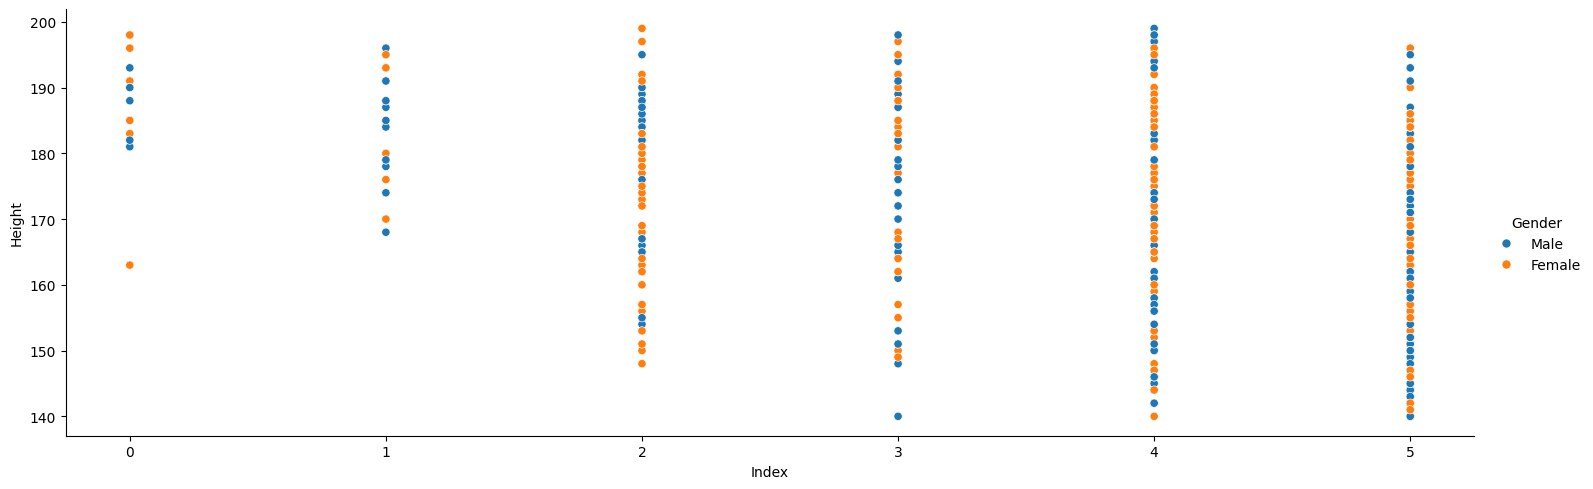

In [38]:
sns.relplot(x="Index",y="Height",hue="Gender", data =data, height=5,aspect=3)

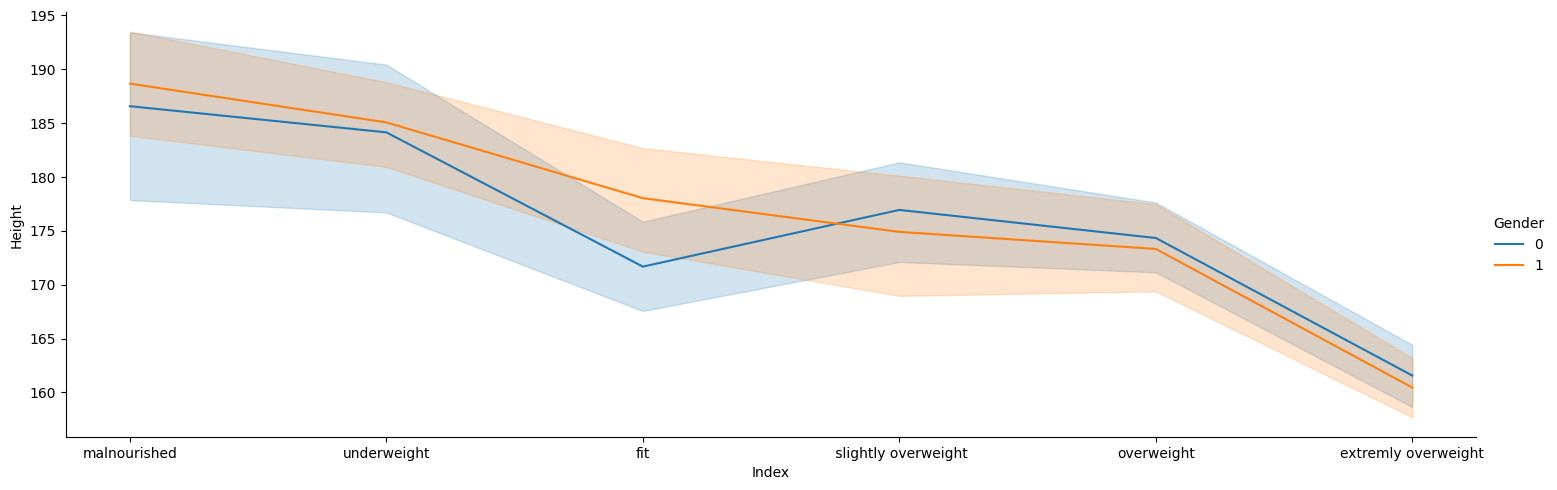

In [57]:
sns.relplot(x="Index",y="Height",hue="Gender", kind="line", data =data, height=5,aspect=3)

In [58]:
x=data.drop('Index',axis=1)
y=data['Index']

In [106]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [107]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [108]:
s=StandardScaler()
x_train =s.fit_transform(x_train)
x_test =s.transform(x_test)


In [109]:
clf =svm.SVC()
clf.fit(x_train,y_train)
pred=clf.predict(x_test)

In [114]:
print(classification_report(y_test, pred, zero_division=1))

                      precision    recall  f1-score   support

 slightly overweight       0.78      0.93      0.85        15
 extremly overweight       0.88      0.97      0.92        36
                 fit       0.73      0.80      0.76        10
        malnourished       1.00      0.00      0.00         3
          overweight       0.96      0.78      0.86        32
         underweight       0.60      0.75      0.67         4

            accuracy                           0.85       100
           macro avg       0.82      0.71      0.68       100
        weighted avg       0.87      0.85      0.84       100



In [111]:
print(confusion_matrix(y_test,pred))

[[14  0  1  0  0  0]
 [ 0 35  0  0  1  0]
 [ 2  0  8  0  0  0]
 [ 0  0  1  0  0  2]
 [ 2  5  0  0 25  0]
 [ 0  0  1  0  0  3]]


In [112]:
print(accuracy_score(y_test,pred))

0.85


In [119]:
import warnings
warnings.simplefilter("ignore", UserWarning)

a = np.array([[0, 185, 110]])
a_scaled = s.transform(a)
b = clf.predict(a_scaled)


In [120]:
b

array(['overweight'], dtype=object)

In [118]:
data

,Gender,Height,Weight,Index
0,1,174,96,overweight
1,1,189,87,fit
2,0,185,110,overweight
3,0,195,104,slightly overweight
4,1,149,61,slightly overweight
...,...,...,...,...
495,0,150,153,extremly overweight
496,0,184,121,overweight
497,0,141,136,extremly overweight
498,1,150,95,extremly overweight
